In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold,axis=1)

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
print(df.shape)
x = df['review']
y = df['sentiment']

(50000, 2)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq,maxlen=100)
x_test_pad = pad_sequences(x_test_seq,maxlen=100)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000,output_dim=128,input_length=100))
model.add(LSTM(128,return_sequences=False))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics= ['accuracy'])

In [ ]:
epoch = 10
batch_size = 32

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_pad,y_train,epochs=epoch,batch_size=batch_size,validation_data=(x_test_pad,y_test),callbacks=[early_stopping])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7546 - loss: 0.4757 - val_accuracy: 0.8660 - val_loss: 0.3108
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8866 - loss: 0.2720 - val_accuracy: 0.8736 - val_loss: 0.2964
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9168 - loss: 0.2139 - val_accuracy: 0.8714 - val_loss: 0.3084
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9353 - loss: 0.1677 - val_accuracy: 0.8682 - val_loss: 0.3486
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9524 - loss: 0.1267 - val_accuracy: 0.8659 - val_loss: 0.3639


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8791 - loss: 0.2950
Test Accuracy: 0.87


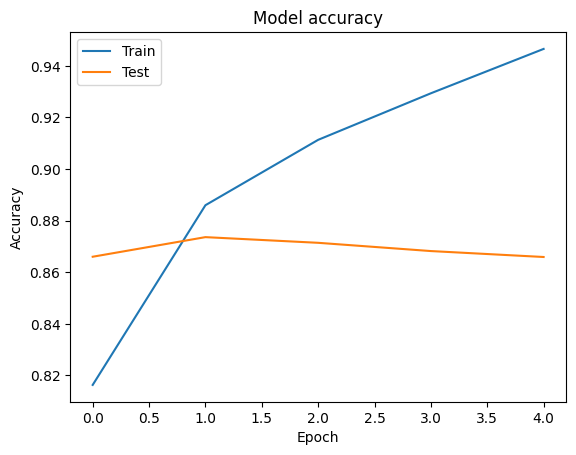

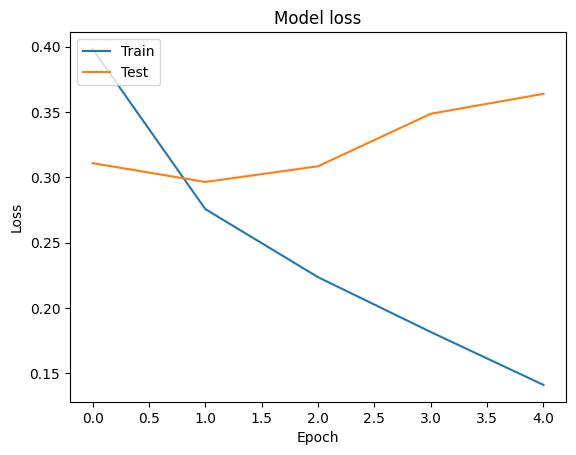

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()